# Regularization and Cross-Validation

Prepared by: Benjamin Ricard, QBS108 TA | Last update: 11/26/2018

### Learning Objectives

By the end of this tutorial, students should be able to:

* Understand the theoretical and mathematical basis for regularization
* Explain the concept and procedure for a standard training, validation, testing expriment.

### General Procedure

* Simulate a linear data that is known to be better approximated by first-order regression models (Chen, Demo 1)
* Fit polynomial regression to data
* Use regularization to improve overfitting of polynomial regression 

### Load modules and implement helper functions

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score #other metrics can be used
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def f(x, FUN=lambda x: 15+5*x):
    '''
    Helper function to approximate data by an input function
    Parameters:
        x: 1D array
        FUN: Mathematical function of interest. Defaults to sin
    '''
    return FUN(x); 

def simulate_data(a, b, N, seed=42):
    '''
    Function to simulate non-linear data
    Parameters:
        a,b: Range/bounds
        N: Number of examples (i.e. sample size)
        seed: Random seed for shuffling
    '''
    rng = np.random.RandomState(seed); 
    x = np.linspace(a, b, N); 
    x_plot = cp.deepcopy(x);
    x = np.linspace(a, b, N); 
    rng.shuffle(x);  
    noise = np.random.normal(0, (a+b)/2, N);
    return x, f(x)+noise, x_plot, f(x_plot)+noise;


### Construct models and visualize

We will create training, validation and tesitng sets generated from the same simulation (Demo 1), sample sizes 8,8, and 8. Here, our model will be a 9th order polynomial of the form:


\begin{equation*}
y = b + m_1x + m_2 x^2 + ... + m_9 x^9
\end{equation*}

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
a, b, N = 0, 1, 8;
x, y, x_plot, y_plot = simulate_data(a, b, N,seed=11);
train=[]
for i in x:
    train.append([i,i**2,i**3,i**4,i**5,i**6,i**7,i**8,i**9])
trainy=y
trainx=x
x, y, x_plot, y_plot = simulate_data(a, b, N,seed=22);
validation=[]
for i in x:
    validation.append([i,i**2,i**3,i**4,i**5,i**6,i**7,i**8,i**9])
valy=y
valx=x
x, y, x_plot, y_plot = simulate_data(a, b, N,seed=33);
test=[]
for i in x:
    test.append([i,i**2,i**3,i**4,i**5,i**6,i**7,i**8,i**9])
testy=y
testx=x

### Construct models and visualize
Similar to Demo 2, we can solve a minimization of the form:

\begin{equation*}
\frac{1}{N} \sum_i^N (y_i-\hat{y_i})^2
\end{equation*}

where;


\begin{equation*}
\hat{y} = b + m_1x + m_2 x^2 + ... + m_9 x^9
\end{equation*}

We can use gradient descent to solve this, but sklearn works fine for this. However, because there are more features than samples for our model, we will overfit. Using sklearn's LinearRegression function, we see this is the case. 



In [140]:
reg = LinearRegression().fit(train, trainy)

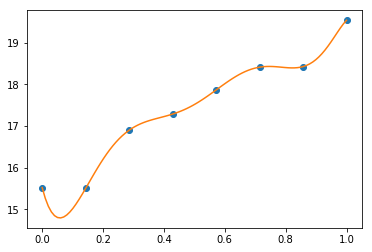

Training accuracy: 1.0
Coefficients
b: 15.5
x^0: -28.532
x^1: 341.233
x^2: -1240.339
x^3: 1767.404
x^4: -282.793
x^5: -1289.065
x^6: 101.095
x^7: 1269.474
x^8: -634.461


In [144]:
plt.plot(trainx, trainy, 'o')
x_plot = np.linspace(0,1,100)
plt.plot(x_plot,reg.intercept_+(reg.coef_[0]*x_plot)+(reg.coef_[1]*x_plot**2)+(reg.coef_[2]*x_plot**3)+(reg.coef_[3]*x_plot**4)+(reg.coef_[4]*x_plot**5)+(reg.coef_[5]*x_plot**6)+(reg.coef_[6]*x_plot**7)+(reg.coef_[7]*x_plot**8)+(reg.coef_[8]*x_plot**9))
plt.show()
print("Training accuracy: "+str(np.round(reg.score(train,trainy),3)))
print("Coefficients")
count=-1
print("b: "+str(np.round(reg.intercept_,1)))
for i in reg.coef_:
    count=count+1
    print ("x^"+str(count)+": "+str(np.round(i,3)))

Notice the perfect fit and 100% accuracy. The more variables we have, the more we overfit. In order to solve this without removing potentially useful features, we can implement regularization. Instead of minimizing the error function as before, we can add a regularization term.

Recall:

\begin{equation*}
\hat{y} = b + m_1x + m_2 x^2 + ... + m_9 x^9
\end{equation*}

For L2-regularized regression (there are others), this makes the new error function:

\begin{equation*}
\frac{1}{2N} \sum_i^N (y_i-(b + m_1x + m_2 x^2 + ... + m_9 x^9))^2 +\frac{\lambda}{2N}\sum_i^N m^2
\end{equation*}

Where $\lambda$ is a regularization hyperparameter to be tuned. Coeffecients that are large, as in the previous example, indicate overfitting. Conceptually, we are adding a term that penalizes the weights $m$ that are large. Statistically, we are solving the same equation as before for the MSE but subject to the constraint of $\sum m^2 \lt s$ where s is a radius of volume defined as a function of lambda. Other common model of regularization is the Least Absolute Shrinkage and Selection (LASSO), which is constrained by $\sum |m|$. 

We will try 2 different values of $\lambda$ to see how regularization effects the models, $\lambda= 1$ and $\lambda = 0.05$.

Regularization: 1


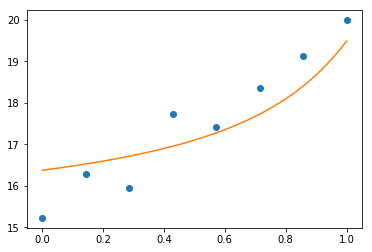

Training accuracy: 0.808
Coefficients: 
b: 16.4
x^0: 0.948
x^1: 0.665
x^2: 0.452
x^3: 0.315
x^4: 0.229
x^5: 0.172
x^6: 0.135
x^7: 0.109
x^8: 0.092


In [147]:
print("Regularization: 1") 
clf1 = Ridge(alpha=1)
clf1.fit(train,trainy)
plt.plot(x, y, 'o')
x_plot = np.linspace(0,1,100)
plt.plot(x_plot,clf1.intercept_+(clf1.coef_[0]*x_plot)+(clf1.coef_[1]*x_plot**2)+(clf1.coef_[2]*x_plot**3)+(clf1.coef_[3]*x_plot**4)+(clf1.coef_[4]*x_plot**5)+(clf1.coef_[5]*x_plot**6)+(clf1.coef_[6]*x_plot**7)+(clf1.coef_[7]*x_plot**8)+(clf1.coef_[8]*x_plot**9))
plt.show()
print("Training accuracy: "+str(np.round(clf1.score(train,trainy),3)))
print("Coefficients: ")
count=-1
print("b: "+str(np.round(clf1.intercept_,1)))
for i in clf1.coef_:
    count=count+1
    print ("x^"+str(count)+": "+str(np.round(i,3)))

Regularization: 0.05


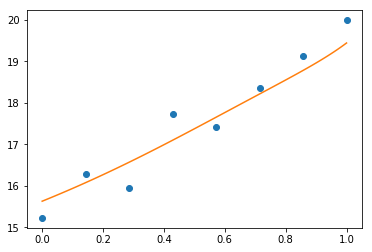

Training accuracy: 0.951
Coefficients: 
b: 15.6
b: 15.6
x^0: 2.979
x^1: 1.107
x^2: 0.091
x^3: -0.278
x^4: -0.321
x^5: -0.214
x^6: -0.042
x^7: 0.152
x^8: 0.347


In [148]:
print("Regularization: 0.05") 
clf05 = Ridge(alpha=.05)
clf05.fit(train,trainy)
plt.plot(x, y, 'o')
x_plot = np.linspace(0,1,100)
plt.plot(x_plot,clf05.intercept_+(clf05.coef_[0]*x_plot)+(clf05.coef_[1]*x_plot**2)+(clf05.coef_[2]*x_plot**3)+(clf05.coef_[3]*x_plot**4)+(clf05.coef_[4]*x_plot**5)+(clf05.coef_[5]*x_plot**6)+(clf05.coef_[6]*x_plot**7)+(clf05.coef_[7]*x_plot**8)+(clf05.coef_[8]*x_plot**9))
plt.show()
print("Training accuracy: "+str(np.round(clf05.score(train,trainy),3)))
print("Coefficients: ")
print("b: "+str(np.round(clf05.intercept_,1)))
count=-1
print("b: "+str(np.round(clf05.intercept_,1)))
for i in clf05.coef_:
    count=count+1
    print ("x^"+str(count)+": "+str(np.round(i,3)))

We can see that all of the coefficients have shrunk. Although our training accuracy is not as high, intuitively, it seems like our model is doing better than before. Statistically, the estimator has less variance (though still may be biased!)

Now the question becomes how to choose the best model. To do this, we use the validation data set we generated before. When training a model, you should **never** evaluate a model on the same data you trained the model on (this will lead to overfitting!) Instead, you should split your data into 3 parts: training, validation, and testing. The validation set will provide a way to compare different models on the same (unseen) data set.

Even though training accuracy is perfect for the non-regularized model, the results on the validation set indicate that the regularization with 0.05 works best.

In [155]:
print("Regularization, Training Accuracy")
print("None: ",np.round(reg.score(train,trainy),3))
print("0.05: ", np.round(clf05.score(train,trainy),3))
print("1.00: ", np.round(clf1.score(train,trainy),3))


Regularization, Training Accuracy
None:  1.0
0.05:  0.951
1.00:  0.808


In [156]:
print("Regularization, Validation Accuracy")
print("None: ",np.round(reg.score(validation,valy),3))
print("0.05: ",np.round(clf05.score(validation,valy),3))
print("1.00: ",np.round(clf1.score(validation,valy),3))


Regularization, Validation Accuracy
None:  0.762
0.05:  0.768
1.00:  0.603


So, we believe the model trained on $\lambda=0.05$ as the best. Let's see if we were right.

In [154]:
print("Regularization, Testing Accuracy")
print("None: ",np.round(reg.score(test, testy),3))
print("0.05: ",np.round(clf05.score(test,testy),3))
print("0.05: ",np.round(clf1.score(test,testy),3))

Regularization, Testing Accuracy
None:  0.857
0.05:  0.921
0.05:  0.799


Success! Regularization helped us prevent overfitting, without getting rid of variables.